<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


In [1]:
%tensorflow_version 2.x

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
rank_0_tensor = tf.constant(99.99)
print(rank_0_tensor)
print(type(rank_0_tensor))

tf.Tensor(99.99, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [5]:
rank_1_tensor = tf.constant([9,8,7,6,5])
print(rank_1_tensor)
print(type(rank_1_tensor))

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [6]:
value1 = tf.add(rank_0_tensor, 7)
print(value1)

tf.Tensor(106.99, shape=(), dtype=float32)


In [7]:
value2 = tf.add(rank_1_tensor, 7)
print(value2)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [8]:
rank_2_tensor = tf.constant([[1, 2, 3],
                             [4, 5, 6]])
print(rank_2_tensor)
                             

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [9]:
tf.reshape(rank_2_tensor, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [10]:
print("dtype:",rank_2_tensor.dtype)
print("Number of axes:",rank_2_tensor.ndim)
print("Shape:", rank_2_tensor.shape)


dtype: <dtype: 'int32'>
Number of axes: 2
Shape: (2, 3)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization
from keras.utils.vis_utils import plot_model 
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

## Question 1

### Load the data
- Load the data, check the shape of data

In [12]:
dfcar = pd.read_csv("/drive/MyDrive/car_data-1.csv")
dfcar.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [13]:
dfcar.shape

(8128, 11)

**Observation:**
There are 8128 rows and 11 attributes in dataset

## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

**Covert Numeric Value**

In [14]:
# Define the function for converting to numeric

def convert_num(num):
  try:
    if type(num) == str:
      return float(num.split()[0])
    else:
      return num
  except:
    return np.nan

In [15]:
# Apply the function for mileage, engine and max_power
dfcar[['mileage','engine','max_power']] = dfcar[['mileage','engine','max_power']].applymap(convert_num)

In [16]:
# Checking that string converted into numeric
dfcar.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Apply Label Encoder**

In [17]:
# Checking the unique values in owner attribute
dfcar['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [18]:
# Assign the number for each value in owner attribute
dic = {'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth & Above Owner':4, 'Test Drive Car':5}
       
# Replace string value with number for each value
dfcar['owner'] = dfcar['owner'].map(dic)
dfcar.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


**OneHot Encoder**

In [19]:
# Aply OneHot encode function
onehot = OneHotEncoder(sparse=False, dtype=np.int64)
cat_col = ['fuel','seller_type','transmission']
trans = onehot.fit_transform(dfcar[cat_col])
encoded_data = pd.DataFrame(trans, columns=onehot.get_feature_names(cat_col))
encoded_data.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1


In [20]:
# Drop the actual attributes and add the encoded attributes
df1= dfcar.drop(columns=cat_col,axis=1)
final_df = pd.concat([df1,encoded_data],axis=1)
final_df.head()


,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


**Missing Value**

In [21]:
final_df.isnull().sum()

year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       216
seats                           221
fuel_CNG                          0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Dealer                0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Automatic            0
transmission_Manual               0
dtype: int64

**Observation:** There are missing values in mileage, engine, seats and max_power attributes

In [22]:
# Dropping missing values
final_df.dropna(axis=0, inplace=True)

In [23]:
# Checking the number of records and columns after dropping missing values
final_df.shape

(7906, 17)

**Observation:** There are 7906 records and 17 attributes after dropping missing values.

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [24]:
# Split the independent and target variables
X = final_df.drop('selling_price', axis=1)
y = final_df['selling_price']

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5929, 16), (1977, 16), (5929,), (1977,))

In [25]:
# Apply the scaling
sc = StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [26]:
#Initialize the model
model = tf.keras.Sequential()

In [27]:
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(64, input_shape=(16,), activation='relu'))
model.add(Dropout(0.15))

model.add(tf.keras.layers.Dense(128,  activation='relu'))
model.add(Dropout(0.10))

model.add(tf.keras.layers.Dense(32,  activation='relu'))
model.add(Dropout(0.05))

model.add(tf.keras.layers.Dense(1,  activation='linear'))

### Check model summary and visualize the model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

**Observation:** There are 13569 trainable parameters in the model.

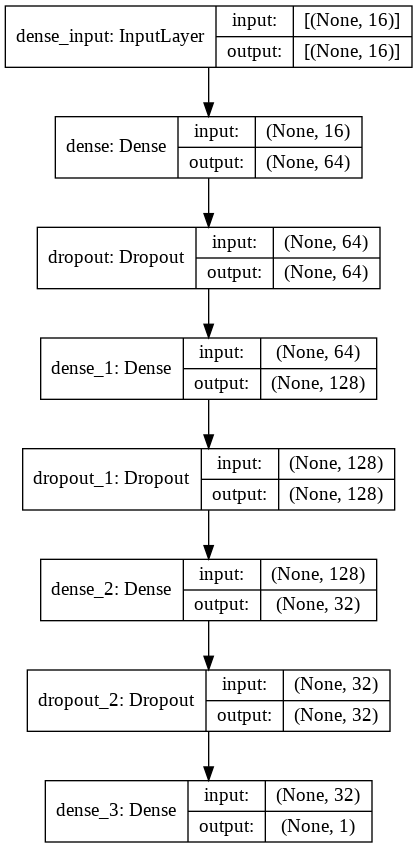

In [29]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [30]:
from keras import backend as K

# Define the function for finding R2 score
def r_2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [31]:
#Compile the model and r_2_Score used as metrics
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history = model.fit(scaledXtrain, y_train,
            validation_data=(scaledXtest, y_test), 
            epochs=1000,
            batch_size = 32,
            verbose=1,
            callbacks= callback
         )

Epoch 1/1000
186/186 [==============================] - 4s 5ms/step - loss: 653907.2199 - r_2_score: -1.2499 - val_loss: 649167.0625 - val_r_2_score: -1.0157
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 619378.0471 - r_2_score: -1.0695 - val_loss: 547582.1250 - val_r_2_score: -0.6477
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 476975.1247 - r_2_score: -0.5074 - val_loss: 330842.0312 - val_r_2_score: 0.1952
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 309283.1337 - r_2_score: 0.3142 - val_loss: 256401.5469 - val_r_2_score: 0.5148
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 245202.9203 - r_2_score: 0.5144 - val_loss: 229487.9219 - val_r_2_score: 0.6055
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 213234.8580 - r_2_score: 0.6150 - val_loss: 214523.1562 - val_r_2_score: 0.6493
Epoch 7/1000
186/186 [==============================] - 1s 

**Observation:** val_r_2_score is -1.0157 in first epoch. It is increased drastically to 0.8994 in last epoch. Training stopped at 413 epoch since the loss is not decreasing consecutively 10 times.

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [33]:
model.evaluate(scaledXtest, y_test, batch_size=32)

62/62 [==============================] - 0s 1ms/step - loss: 108915.7578 - r_2_score: 0.8981


[108915.7578125, 0.8981474041938782]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [34]:
y_pred = model.predict(scaledXtest)
print(r2_score(y_test,y_pred))

0.945390530840729


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

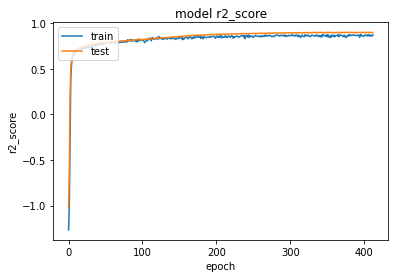

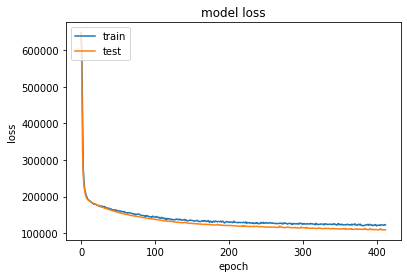

In [35]:
plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Observation:** Above graphs show that R2 score is drastically increased from 1 epoch to 200 epoch. Loss also drastically decreased from 1 epoch to 413 epoch. It shows that this is the good fit model. 

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [36]:
from tensorflow.keras.layers import LeakyReLU
modellek = tf.keras.Sequential()

In [37]:

#Add input layer
modellek.add(tf.keras.Input(shape=(16)))

# Adding layer for batch normalization
modellek.add(tf.keras.layers.BatchNormalization())

# Add hidden layers with LeakRelu activation function
modellek.add(Dense(64))
modellek.add(LeakyReLU(alpha=0.05)) 

modellek.add(Dropout(0.15))  # Add Dropout layer
modellek.add(tf.keras.layers.BatchNormalization())

modellek.add(Dense(128))
modellek.add(LeakyReLU(alpha=0.05))

modellek.add(Dropout(0.10))
modellek.add(tf.keras.layers.BatchNormalization())

modellek.add(Dense(32))
modellek.add(LeakyReLU(alpha=0.05))
modellek.add(Dropout(0.05))

# Add output layers
modellek.add(Dense(1,activation='linear'))

In [38]:
modellek.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1088      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)              

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [39]:
# Compile the model with adam optimizer
modellek.compile(loss='mean_absolute_error',optimizer='adam', metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [40]:
# Adding checkpoint to save the model after every epoch
check_point = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

# Traini the model
history = modellek.fit(scaledXtrain, y_train,
            validation_data=(scaledXtest, y_test), 
            epochs=1000,
            batch_size = 16,
            verbose=1,
            callbacks= [callback,check_point]
         )

Epoch 1/1000
371/371 [==============================] - 2s 4ms/step - loss: 644460.1286 - r_2_score: -1.8864 - val_loss: 653328.2500 - val_r_2_score: -1.8194
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/1000
371/371 [==============================] - 1s 4ms/step - loss: 646552.2853 - r_2_score: -1.7390 - val_loss: 650682.3125 - val_r_2_score: -1.7996
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/1000
371/371 [==============================] - 1s 4ms/step - loss: 640390.6868 - r_2_score: -1.7035 - val_loss: 640792.1875 - val_r_2_score: -1.7272
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/1000
371/371 [==============================] - 1s 4ms/step - loss: 629015.0732 - r_2_score: -1.7491 - val_loss: 627032.6250 - val_r_2_score: -1.6276
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 5/1000
371/371 [==============================] - 1s 4ms/step - loss: 604737.1159 - r_2_score: -1.5151 - val_loss: 601190.3750 - val_r_2_score

**Observation:** With batch size 16, val_r_2_score is -1.8194 and it is increased to 0.7744 at 62 epoch since loss is not decreasing consecutively 10 times.

### Check the R2 score on complete test data

In [41]:
modellek.evaluate(scaledXtest,y_test,batch_size=16)

y_pred= modellek.predict(scaledXtest)
print(r2_score(y_test,y_pred))

124/124 [==============================] - 0s 2ms/step - loss: 150381.7188 - r_2_score: 0.7622
0.8469230309545733


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

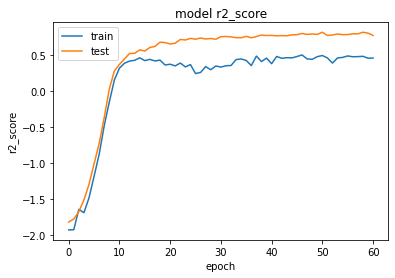

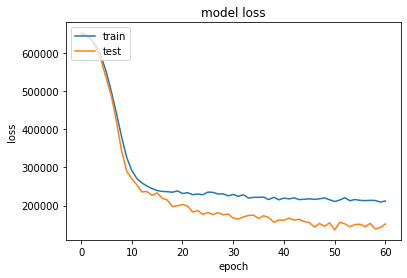

In [98]:
plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:** r2 score is increased from 1 epoch to 62 epoch. R2 score for training set is lower than test set. Loss is drastically reduced from 1 epoch to 62 epoch. Loss for test is lower than training set. 

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [42]:
# Initilalize the model
model_rg = tf.keras.Sequential()

# Initilaize the weights
initializer = tf.keras.initializers.HeUniform(seed=7)

# Add input layer
model_rg.add(tf.keras.Input(shape=(16)))

# Add hidden layers and dropout
model_rg.add(Dense(256,activation='relu',kernel_initializer=initializer))
model_rg.add(Dropout(0.15))

# Add batch normalization
model_rg.add(tf.keras.layers.BatchNormalization())

model_rg.add(Dense(128,activation='relu'))
model_rg.add(Dropout(0.10))

model_rg.add(tf.keras.layers.BatchNormalization())

model_rg.add(Dense(64,activation='relu'))
model_rg.add(Dropout(0.05))

model_rg.add(tf.keras.layers.BatchNormalization())

model_rg.add(Dense(32,activation='relu'))
model_rg.add(Dropout(0.10))

# Add output layer
model_rg.add(Dense(1,activation='linear'))

In [43]:
model_rg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [44]:
# Compile the model with adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_rg.compile(loss='mse',optimizer=opt, metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [45]:
# Add checkpoint to save the model after each epoch
check_point = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

# Train the model
history = model_rg.fit(scaledXtrain, y_train,
            validation_data=(scaledXtest, y_test), 
            epochs=1000,
            batch_size = 64,
            verbose=1,
            callbacks= [callback,check_point]
         )

Epoch 1/1000
93/93 [==============================] - 1s 6ms/step - loss: 1078708449541.4468 - r_2_score: -0.9063 - val_loss: 1123042590720.0000 - val_r_2_score: -0.7554
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/1000
93/93 [==============================] - 0s 5ms/step - loss: 1061045309527.1489 - r_2_score: -0.8112 - val_loss: 1002712858624.0000 - val_r_2_score: -0.5721
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/1000
93/93 [==============================] - 0s 5ms/step - loss: 914779158833.0212 - r_2_score: -0.5789 - val_loss: 694079586304.0000 - val_r_2_score: -0.0708
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/1000
93/93 [==============================] - 0s 5ms/step - loss: 544691593041.7021 - r_2_score: 0.0997 - val_loss: 335170600960.0000 - val_r_2_score: 0.4523
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 5/1000
93/93 [==============================] - 0s 4ms/step - loss: 250944372038.8085 - r_2_score: 0

**Observation:** With batch size 64, val_r_2_score is -0.75544 and it is increased to 0.8744 at 20 epoch since loss is not decreasing consecutively 10 times.

### Check the R2 score on complete test data

In [46]:
model_rg.evaluate(scaledXtest,y_test,batch_size=64)

y_pred= model_rg.predict(scaledXtest)
print(r2_score(y_test,y_pred))

31/31 [==============================] - 0s 2ms/step - loss: 62934990848.0000 - r_2_score: 0.8982
0.911011501695256


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

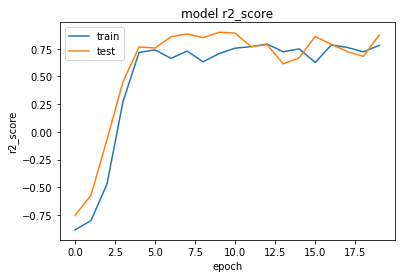

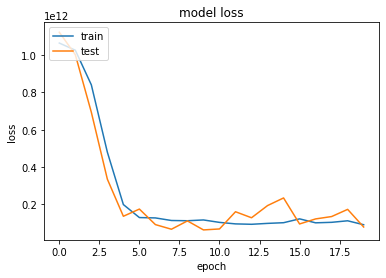

In [47]:
plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:** Above graphs show that R2 score is drastically increased from 1 epoch to 20 epoch. Loss also drastically decreased from 1 epoch to 20 epoch. 

**Take Away:** There is a change in loss if there is a change in Batch size, number of hidden layers, Batch normalization and actiavation funcation. 